In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from scipy.spatial import distance

%matplotlib inline

In [20]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    dis = distance.cdist(X1,X2,'sqeuclidean')
    return np.exp(-dis/(2*sigma**2))

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO
    return (offset+linear_kernel(X1,X2))**degree


In [10]:
#6.2.2
x_0 = np.array([-4,-1,0,2]).reshape(-1,1)
linear_kernel(x_0, x_0)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

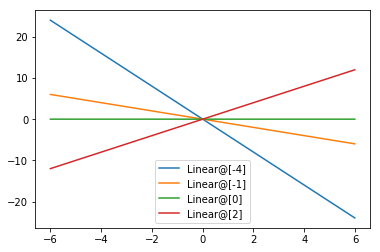

In [9]:
# PLot kernel machine functions
#6.2.3
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

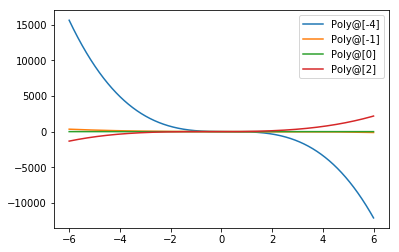

In [11]:
#poly kernel
y_2 = polynomial_kernel(prototypes, xpts, 1, 3)
for i in range(len(prototypes)):
    label = "Poly@"+str(prototypes[i,:])
    plt.plot(xpts, y_2[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

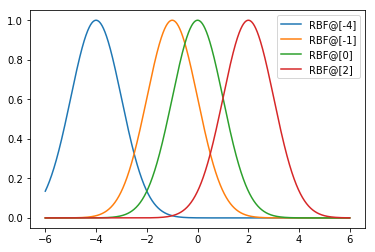

In [21]:
#RBF kernel
y_3 = RBF_kernel(prototypes, xpts, 1)
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y_3[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

In [46]:
#6.2.3(d)
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R with entries w_1,...,w_R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        # TODO
        knl = self.kernel(X, self.prototype_points)
        return np.dot(knl, self.weights)

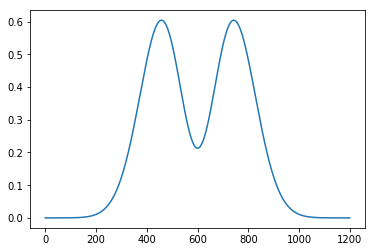

In [48]:
proto = np.array([-1,0,1]).reshape(-1,1)
corr_weight = np.array([1, -1, 1]).reshape(-1,1)
k = functools.partial(RBF_kernel, sigma = 1)
km = Kernel_Machine(k, proto, corr_weight)
plt.plot(km.predict(xpts))


Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [8]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

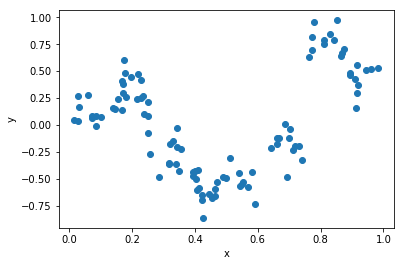

In [85]:
#plot_step = .001
#xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train, y_train,'o')
plt.xlabel("x")
plt.ylabel('y')
plt.show()

In [52]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    knl = kernel(X,X)
    I = np.identity(knl.shape[0])
    alpha = np.dot(np.linalg.inv(l2reg*I+knl),y)
    return Kernel_Machine(kernel, X, alpha)

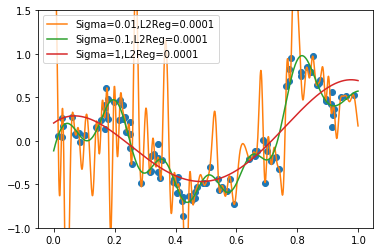

In [53]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

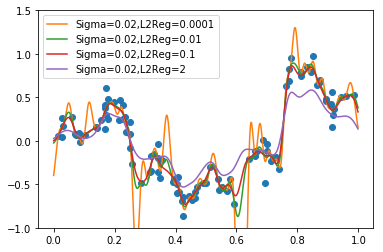

In [55]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

In [57]:
#6.3.5
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [58]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [59]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['RBF'], 'sigma': [0.1, 1, 10], 'l2reg': array([ 32.    ,  16.    ,   8.    ,   4.    ,   2.    ,   1.    ,
         0.5   ,   0.25  ,   0.125 ,   0.0625])}, {'kernel': ['polynomial'], 'offset': [-1, 0, 1], 'degree': [2, 3, 4], 'l2reg': [10, 0.1, 0.01]}, {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [60]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.021270,0.023245
24,-,RBF,0.1250,-,0.1,0.022885,0.024608
21,-,RBF,0.2500,-,0.1,0.024845,0.026226
18,-,RBF,0.5000,-,0.1,0.026609,0.028110
15,-,RBF,1.0000,-,0.1,0.027562,0.030319
12,-,RBF,2.0000,-,0.1,0.028041,0.033539
9,-,RBF,4.0000,-,0.1,0.030082,0.039685
6,-,RBF,8.0000,-,0.1,0.037650,0.052373
54,4,polynomial,0.0100,-1,-,0.043454,0.060135
3,-,RBF,16.0000,-,0.1,0.055006,0.075591


In [68]:
df_toshow.loc[df_toshow['param_kernel'] == 'RBF'].sort_values(by = ['mean_test_score'])[:20]

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.021270,0.023245
24,-,RBF,0.1250,-,0.1,0.022885,0.024608
21,-,RBF,0.2500,-,0.1,0.024845,0.026226
18,-,RBF,0.5000,-,0.1,0.026609,0.028110
15,-,RBF,1.0000,-,0.1,0.027562,0.030319
12,-,RBF,2.0000,-,0.1,0.028041,0.033539
9,-,RBF,4.0000,-,0.1,0.030082,0.039685
6,-,RBF,8.0000,-,0.1,0.037650,0.052373
3,-,RBF,16.0000,-,0.1,0.055006,0.075591
28,-,RBF,0.0625,-,1,0.063632,0.098843


In [104]:
#tune RBF
#param_rbf = np.exp2(-np.arange(-8,-5,0.5))
param_grid = [{'kernel': ['RBF'],'sigma':np.arange(1e-10,0.1,0.005), 'l2reg': np.exp2(np.arange(-15,-2,0.05))}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid2 = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid2.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 
df2 = pd.DataFrame(grid2.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df2['mean_test_score'] = -df2['mean_test_score']
df2['mean_train_score'] = -df2['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg" ,"param_sigma", 
        "mean_test_score","mean_train_score"]
df2_toshow = df2[cols_to_keep].fillna('-')
df2_toshow.sort_values(by=["mean_test_score"])[:30]

,param_kernel,param_l2reg,param_sigma,mean_test_score,mean_train_score
5012,RBF,0.176777,0.060,0.013805,0.014446
4992,RBF,0.170755,0.060,0.013806,0.014391
5032,RBF,0.183011,0.060,0.013807,0.014503
4972,RBF,0.164938,0.060,0.013808,0.014337
5052,RBF,0.189465,0.060,0.013810,0.014562
4952,RBF,0.159320,0.060,0.013813,0.014284
4713,RBF,0.105112,0.065,0.013814,0.014479
4693,RBF,0.101532,0.065,0.013814,0.014432
4733,RBF,0.108819,0.065,0.013815,0.014528
5072,RBF,0.196146,0.060,0.013816,0.014623


In [107]:
#read sigma fix l2reg
param_grid = [{'kernel': ['RBF'],'sigma':np.arange(1e-10,0.1,0.005), 'l2reg': [0.176777]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid2 = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid2.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 
df2 = pd.DataFrame(grid2.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df2['mean_test_score'] = -df2['mean_test_score']
df2['mean_train_score'] = -df2['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg" ,"param_sigma", 
        "mean_test_score","mean_train_score"]
df2_toshow = df2[cols_to_keep].fillna('-')
df2_toshow.sort_values(by=["mean_test_score"])[:20]

,param_kernel,param_l2reg,param_sigma,mean_test_score,mean_train_score
12,RBF,0.176777,6.000000e-02,0.013805,0.014446
11,RBF,0.176777,5.500000e-02,0.013984,0.013652
13,RBF,0.176777,6.500000e-02,0.014045,0.015379
10,RBF,0.176777,5.000000e-02,0.014404,0.012841
14,RBF,0.176777,7.000000e-02,0.014832,0.016613
9,RBF,0.176777,4.500000e-02,0.014883,0.011975
8,RBF,0.176777,4.000000e-02,0.015282,0.011135
7,RBF,0.176777,3.500000e-02,0.015656,0.010365
15,RBF,0.176777,7.500000e-02,0.016159,0.018182
6,RBF,0.176777,3.000000e-02,0.016303,0.009675


In [91]:
#tune polynomial
param_grid3 = [{'kernel': ['polynomial'],'degree':np.arange(4,20, 1), 'l2reg': np.exp2(np.arange(-15,-5,0.1)),
              'offset':np.arange(-10,0, 1)}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid3 = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid3,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid3.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 
df3 = pd.DataFrame(grid3.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df3['mean_test_score'] = -df3['mean_test_score']
df3['mean_train_score'] = -df3['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg", "param_degree", "param_offset",
                "mean_test_score","mean_train_score"]
df3_toshow = df3[cols_to_keep].fillna('-')
df3_toshow.sort_values(by=["mean_test_score"])[:20]

,param_kernel,param_l2reg,param_degree,param_offset,mean_test_score,mean_train_score
10574,polynomial,0.001586,14,-6,0.024660,0.031331
10564,polynomial,0.001480,14,-6,0.024672,0.032009
10614,polynomial,0.002093,14,-6,0.024854,0.030574
10185,polynomial,0.000106,14,-5,0.024879,0.034693
10524,polynomial,0.001122,14,-6,0.024924,0.036988
10245,polynomial,0.000161,14,-5,0.024929,0.031140
10833,polynomial,0.009618,14,-7,0.024954,0.033100
10514,polynomial,0.001047,14,-6,0.024956,0.037785
10235,polynomial,0.000150,14,-5,0.025041,0.031448
10504,polynomial,0.000977,14,-6,0.025052,0.039320


In [113]:
#fix offset, param_degress
param_grid3 = [{'kernel': ['polynomial'],'degree':[14], 'l2reg': np.exp2(np.arange(-15,-5,0.1)),
              'offset':[-6]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid3 = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid3,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid3.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 
df3 = pd.DataFrame(grid3.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df3['mean_test_score'] = -df3['mean_test_score']
df3['mean_train_score'] = -df3['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg", "param_degree", "param_offset",
                "mean_test_score","mean_train_score"]
df3_toshow = df3[cols_to_keep].fillna('-')
df3_toshow.sort_values(by=["mean_test_score"])[:20]

,param_kernel,param_l2reg,param_degree,param_offset,mean_test_score,mean_train_score
57,polynomial,0.001586,14,-6,0.024660,0.031331
56,polynomial,0.001480,14,-6,0.024672,0.032009
61,polynomial,0.002093,14,-6,0.024854,0.030574
52,polynomial,0.001122,14,-6,0.024924,0.036988
51,polynomial,0.001047,14,-6,0.024956,0.037785
50,polynomial,0.000977,14,-6,0.025052,0.039320
54,polynomial,0.001289,14,-6,0.025418,0.033748
66,polynomial,0.002960,14,-6,0.025564,0.029528
64,polynomial,0.002577,14,-6,0.025618,0.029612
63,polynomial,0.002405,14,-6,0.025655,0.029776


In [115]:
#fix l2reg, offset
param_grid3 = [{'kernel': ['polynomial'],'degree':np.arange(4,20, 1), 'l2reg': [0.001586],
              'offset':[-6]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid3 = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid3,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid3.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 
df3 = pd.DataFrame(grid3.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df3['mean_test_score'] = -df3['mean_test_score']
df3['mean_train_score'] = -df3['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg", "param_degree", "param_offset",
                "mean_test_score","mean_train_score"]
df3_toshow = df3[cols_to_keep].fillna('-')
df3_toshow.sort_values(by=["mean_test_score"])[:20]

,param_kernel,param_l2reg,param_degree,param_offset,mean_test_score,mean_train_score
10,polynomial,0.001586,14,-6,0.024660,0.031331
9,polynomial,0.001586,13,-6,0.029886,0.029703
8,polynomial,0.001586,12,-6,0.030445,0.031115
6,polynomial,0.001586,10,-6,0.031442,0.038694
5,polynomial,0.001586,9,-6,0.031482,0.039292
4,polynomial,0.001586,8,-6,0.032301,0.039440
0,polynomial,0.001586,4,-6,0.034799,0.052644
1,polynomial,0.001586,5,-6,0.040457,0.043195
2,polynomial,0.001586,6,-6,0.043192,0.042639
3,polynomial,0.001586,7,-6,0.044805,0.044029


In [116]:
#fix l2reg, degree
param_grid3 = [{'kernel': ['polynomial'],'degree':[14], 'l2reg': [0.001586],
              'offset':np.arange(-10,0, 1)}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid3 = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid3,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid3.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 
df3 = pd.DataFrame(grid3.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df3['mean_test_score'] = -df3['mean_test_score']
df3['mean_train_score'] = -df3['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg", "param_degree", "param_offset",
                "mean_test_score","mean_train_score"]
df3_toshow = df3[cols_to_keep].fillna('-')
df3_toshow.sort_values(by=["mean_test_score"])[:20]

,param_kernel,param_l2reg,param_degree,param_offset,mean_test_score,mean_train_score
4,polynomial,0.001586,14,-6,0.024660,0.031331
5,polynomial,0.001586,14,-5,0.027410,0.028653
9,polynomial,0.001586,14,-1,0.029786,0.043859
8,polynomial,0.001586,14,-2,0.032687,0.036030
6,polynomial,0.001586,14,-4,0.032818,0.030837
7,polynomial,0.001586,14,-3,0.059947,0.050606
0,polynomial,0.001586,14,-10,3.839574,0.800597
3,polynomial,0.001586,14,-7,17.180287,8.935204
1,polynomial,0.001586,14,-9,71.841665,73.304396
2,polynomial,0.001586,14,-8,108623.612032,71030.233578


In [112]:
#tune linear
param_grid4 = [{'kernel': ['linear'],'l2reg': np.exp2(np.arange(-15,2,0.005))}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid4 = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid4,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid4.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 
df4 = pd.DataFrame(grid4.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df4['mean_test_score'] = -df4['mean_test_score']
df4['mean_train_score'] = -df4['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg", 
                "mean_test_score","mean_train_score"]
df4_toshow = df4[cols_to_keep].fillna('-')
df4_toshow.sort_values(by=["mean_test_score"])[:20]

,param_kernel,param_l2reg,mean_test_score,mean_train_score
3393,linear,3.904127,0.16451,0.206560
3394,linear,3.917681,0.16451,0.206561
3392,linear,3.890620,0.16451,0.206560
3395,linear,3.931282,0.16451,0.206561
3391,linear,3.877159,0.16451,0.206560
3396,linear,3.944931,0.16451,0.206561
3390,linear,3.863745,0.16451,0.206559
3397,linear,3.958627,0.16451,0.206562
3389,linear,3.850378,0.16451,0.206559
3398,linear,3.972370,0.16451,0.206562


In [61]:
# Can be a more convenient way to look at the table
import qgrid 
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.show_grid(df_toshow)

ModuleNotFoundError: No module named 'qgrid'

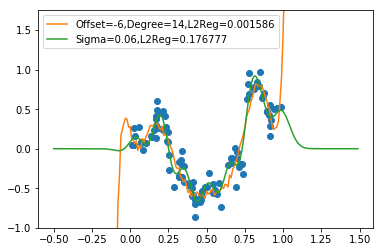

In [117]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= -6
degree = 14
l2reg = 0.001586
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.06
l2reg= 0.176777
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

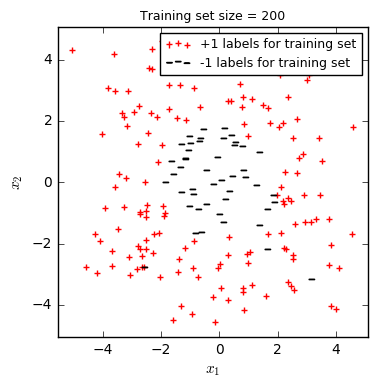

In [8]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [ ]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, ...)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()